#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [18]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Space for your code
print ("Job Satisfaction: {:.4f}".format(df["JobSatisfaction"].isnull().sum()/df.shape[0]))


Job Satisfaction: 0.2015


In [20]:
#More space for code
df["EmploymentStatus"].value_counts()

Employed full-time                                      13655
Independent contractor, freelancer, or self-employed     1866
Employed part-time                                       1168
Not employed, and not looking for work                   1066
Not employed, but looking for work                        906
I prefer not to say                                       381
Retired                                                    60
Name: EmploymentStatus, dtype: int64

In [21]:
#Additional space for your additional code

df["JobSatisfaction"].value_counts(dropna=False)


NaN     3849
8.0     3483
7.0     3087
9.0     2159
6.0     1749
10.0    1529
5.0     1370
4.0      668
3.0      598
2.0      322
0.0      154
1.0      134
Name: JobSatisfaction, dtype: int64

In [22]:
#Feel free to create new cells as you need them
df_jobsat = df[df["JobSatisfaction"].notnull()]

In [23]:
df_jobsat.groupby(by = "EmploymentStatus")["JobSatisfaction"].mean().sort_values()

EmploymentStatus
Employed part-time                                      6.846154
Employed full-time                                      6.980608
Independent contractor, freelancer, or self-employed    7.231985
Name: JobSatisfaction, dtype: float64

In [24]:
df_comp_size = df[df["CompanySize"].notnull()]
cleanup_nums = {"company_size_ord":     {"Fewer than 10 employees": 0, "10 to 19 employees": 1, "20 to 99 employees": 2, "100 to 499 employees": 3, "500 to 999 employees": 4, "1,000 to 4,999 employees": 5, "5,000 to 9,999 employees": 6, "10,000 or more employees": 7}}
df_comp_size["company_size_ord"] = df_comp_size["CompanySize"]
df_comp_size = df_comp_size.replace(cleanup_nums)
df_comp_size.head()


/var/folders/gz/ztcnzxq13fn3qhmyf1q8s1grzkhrjw/T/ipykernel_38041/3906322586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_size["company_size_ord"] = df_comp_size["CompanySize"]


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,company_size_ord
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,2
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,7
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,7
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,2


In [25]:
df_comp_size["JobSatisfaction"].value_counts(dropna=False)
df_comp_size = df_comp_size[df_comp_size["JobSatisfaction"].notnull()]
df_comp_size = df_comp_size[pd.to_numeric(df_comp_size['company_size_ord'], errors='coerce').notnull()]
df_comp_size["company_size_ord"] = df_comp_size["company_size_ord"].astype(float)


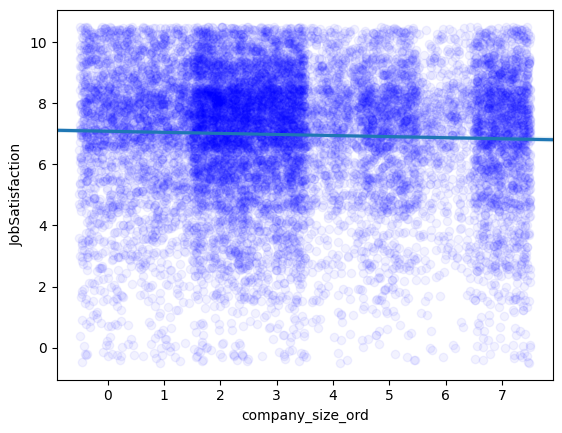

In [26]:
sns.regplot(data = df_comp_size, x = 'company_size_ord', y = 'JobSatisfaction', truncate=False, x_jitter=0.5, y_jitter=0.5, scatter_kws = {"color": "blue", "alpha": 0.05});



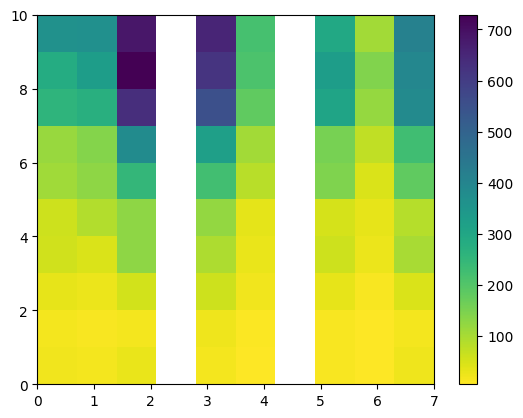

In [27]:
# Use cmin to set a minimum bound of counts
# Use cmap to reverse the color map.
plt.hist2d(data = df_comp_size, x = 'company_size_ord', y = 'JobSatisfaction', cmin=0.5, cmap='viridis_r')
plt.colorbar()


In [28]:
'''
We have ordinal variables and therefore Spearman's test makes sense.
'''

from scipy.stats import spearmanr
# calculate spearman's correlation
coef, p = spearmanr(df_comp_size["company_size_ord"], df_comp_size["JobSatisfaction"])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.5f' % p)
else:
 print('Samples are correlated (reject H0) p=%.5f' % p)


Spearmans correlation coefficient: -0.039
Samples are correlated (reject H0) p=0.00001


In [29]:
'''
We however perform Pearson's Chi-Squared for categorical variables for comparison.
'''
from scipy.stats import chi2, chi2_contingency

table = pd.crosstab(index=df_comp_size['company_size_ord'], columns=df_comp_size['JobSatisfaction'])

stat, p, dof, expected = chi2_contingency(table)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')



Dependent (reject H0)


In [30]:
df_comp_size["CompanySize"].value_counts(dropna=False)
df_comp_size.groupby(by="CompanySize")["JobSatisfaction"].mean().sort_values()


CompanySize
10,000 or more employees    6.793617
5,000 to 9,999 employees    6.832155
1,000 to 4,999 employees    6.908506
20 to 99 employees          6.997039
Fewer than 10 employees     7.025719
100 to 499 employees        7.029324
500 to 999 employees        7.029967
10 to 19 employees          7.035739
Name: JobSatisfaction, dtype: float64

In [31]:
df["ProgramHobby"].value_counts()


Yes, I program as a hobby                    9260
Yes, both                                    5033
No                                           3661
Yes, I contribute to open source projects    1148
Name: ProgramHobby, dtype: int64

In [32]:
df.groupby(by = "ProgramHobby")["JobSatisfaction"].mean().sort_values()


ProgramHobby
No                                           6.874806
Yes, I program as a hobby                    6.927150
Yes, I contribute to open source projects    7.158649
Yes, both                                    7.189316
Name: JobSatisfaction, dtype: float64

In [33]:
df["HomeRemote"].value_counts(dropna=False)

A few days each month                                      5876
Never                                                      5288
NaN                                                        2631
All or almost all the time (I'm full-time remote)          1922
Less than half the time, but at least one day each week    1464
More than half, but not all, the time                       676
It's complicated                                            633
About half the time                                         612
Name: HomeRemote, dtype: int64

In [34]:
df.groupby(by = "HomeRemote")["JobSatisfaction"].mean().sort_values()


HomeRemote
Never                                                      6.697127
It's complicated                                           6.942053
More than half, but not all, the time                      6.973684
A few days each month                                      7.096694
About half the time                                        7.125737
Less than half the time, but at least one day each week    7.143786
All or almost all the time (I'm full-time remote)          7.405421
Name: JobSatisfaction, dtype: float64

In [35]:
df["FormalEducation"].value_counts(dropna=False)


Bachelor's degree                                                    8099
Master's degree                                                      4143
Some college/university study without earning a bachelor's degree    2869
Secondary school                                                     2227
Doctoral degree                                                       551
I prefer not to answer                                                409
Primary/elementary school                                             404
Professional degree                                                   255
I never completed any formal education                                145
Name: FormalEducation, dtype: int64

In [36]:
df.groupby("FormalEducation")["JobSatisfaction"].mean().sort_values()


FormalEducation
Bachelor's degree                                                    6.900293
Primary/elementary school                                            6.946237
Master's degree                                                      6.977356
I never completed any formal education                               7.000000
Professional degree                                                  7.075893
Some college/university study without earning a bachelor's degree    7.151268
I prefer not to answer                                               7.211679
Secondary school                                                     7.219512
Doctoral degree                                                      7.438492
Name: JobSatisfaction, dtype: float64

#### Question 1

**1.** Use the space above to assist in matching each variable (**a**, **b**, **c**, **d**, **e**, **f**, **g**, or **h** ) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [37]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d,
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f}
             
t.jobsat_check1(job_sol_1)

Nice job! That's what we found as well!


#### Question 2

**2.** Use the space above to assist in matching each variable (**a**, **b**, **c** ) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

In [38]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a,
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)

Nice job! That's what we found as well!
